### Import Libraries
Let import some libraries to get started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### The Data
Let's start by reading the titanic csv into a pandas DataFrame

In [2]:
df = pd.read_excel('titanic3.xls')



In [3]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


#### Missing Data

We can use seaborn to create a single heatmap to see where we are missing data

In [4]:
df.isnull()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,True,False,True,False
1305,False,False,False,True,False,False,False,False,True,False,True,True,True,False
1306,False,False,False,False,False,False,False,False,True,False,True,False,True,False
1307,False,False,False,False,False,False,False,False,True,False,True,True,True,False


#### checking the null values with the heatmap and using various manipulating techniques to eliminate them. 

<AxesSubplot: >

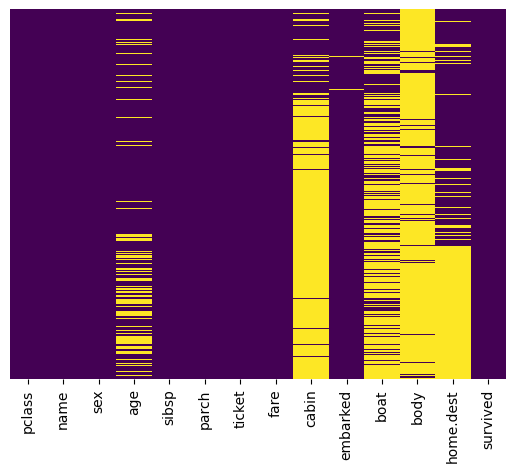

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

About 25% of the age column are missing, from plotting a boxplot of the 'pclass' against age, we can use median of the dataset per age to replace the missing age for each pclass.
The cabin column contain more missing values than the stated values. we are outrightly dropping this value. Same as boat, body and home.dest

<AxesSubplot: xlabel='survived', ylabel='count'>

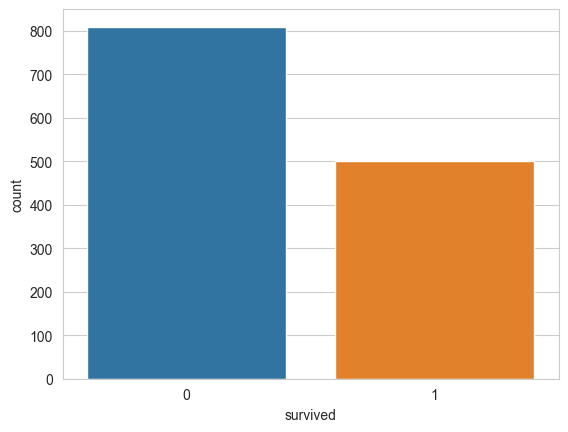

In [6]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived', data = df)

From the countplot we can infer that the more people die than the number of people who survived. The data is skewed already. We may have to use a data balancing technique to get the best inference from our model

<AxesSubplot: xlabel='survived', ylabel='count'>

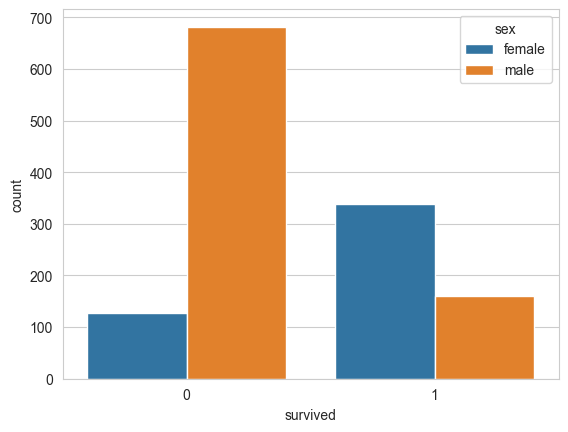

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived', hue= 'sex', data = df)

More male were on the ship compared to female. But more female survived the titanic wreck than the female. As such the women and children were prioritise when help came

<AxesSubplot: xlabel='survived', ylabel='count'>

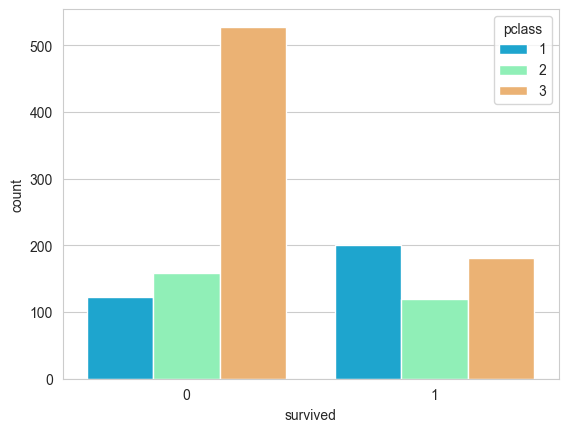

In [8]:


sns.set_style('whitegrid')
sns.countplot(x = 'survived',hue = 'pclass',data = df, palette= 'rainbow')

<AxesSubplot: xlabel='age', ylabel='Count'>

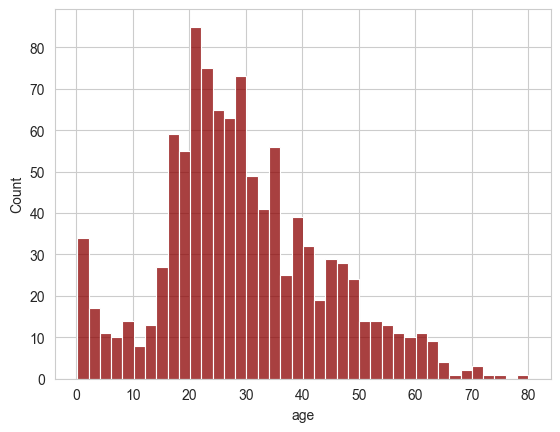

In [9]:
sns.histplot(df['age'].dropna(), kde=False, bins=40, color='darkred')

Most of the people on the ship are middle ae adult between age of 20-40 years

<AxesSubplot: xlabel='sibsp', ylabel='count'>

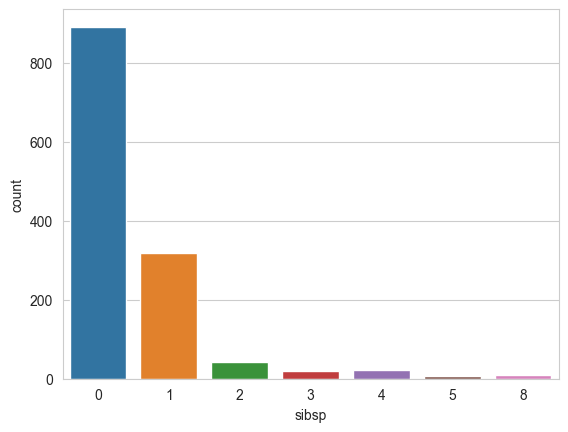

In [10]:
sns.countplot(x='sibsp',data= df)

Most people on ship do not have any siblings or spouse on the ship

<AxesSubplot: >

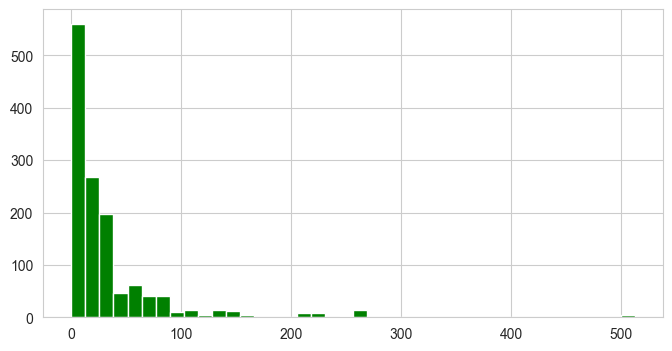

In [11]:
df['fare'].hist(color='green',bins=40, figsize=(8,4))

Most peoplepaid  lower than $100 for the journey as they were in a lower passenger class on the journey

### Data Cleaning

<AxesSubplot: xlabel='pclass', ylabel='age'>

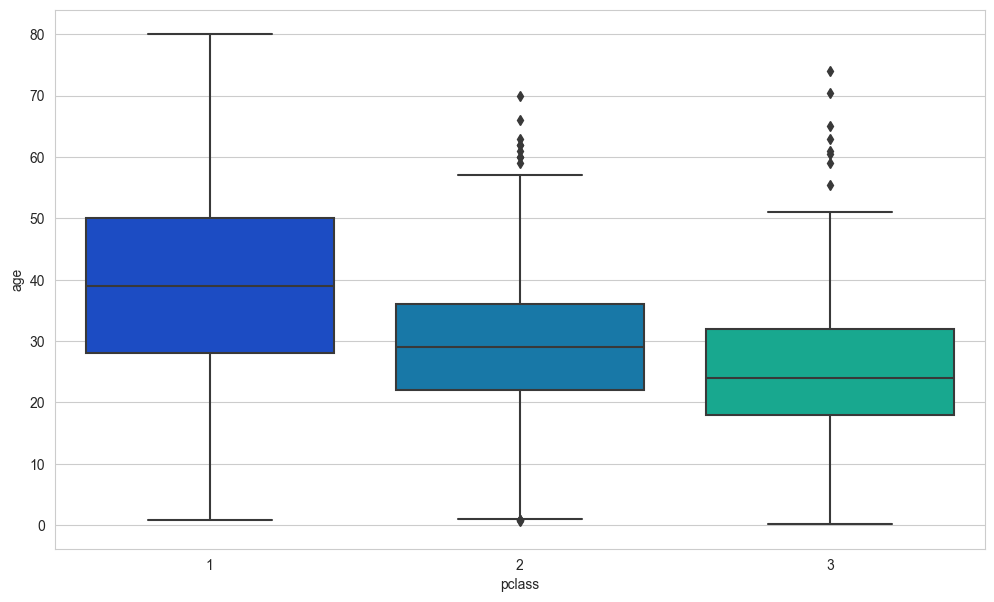

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x= 'pclass', y= 'age', data= df, palette='winter')

The pclass one has a median age of about 38 years and most of the age are around the 30 and 50 years old. There  are some outliers in this particular class.

The class two has a median age of 29 and and most of the age of the people in this class are within the 23 and 36 year of age. 

TThe class three even have a more narrow range with the 25th percentile = 21, and 75th percentile = 28, while the median is 24

In [13]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass ==2:
            return 29
        else:
            return 24
    else:
        return age

In [14]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

<AxesSubplot: >

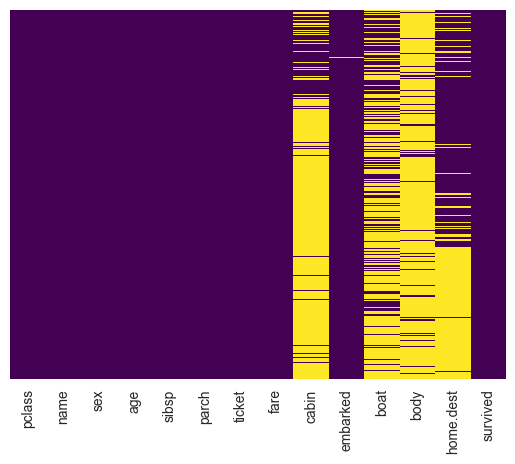

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df.drop('cabin', axis=1, inplace=True)

In [17]:
df.drop(['boat', 'body', 'home.dest'],axis=1,inplace=True)

In [18]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0


### Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas ! Otherwise our machine learning algorithm won't be able to directly take in those features as input

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   embarked  1307 non-null   object 
 9   survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [20]:
embark = pd.get_dummies(df['embarked'],drop_first=True)
Sex = pd.get_dummies(df['sex'],drop_first=True)

In [21]:
df.drop(['sex', 'embarked', 'name', 'ticket'], axis=1, inplace=True)

In [22]:
df = pd.concat([embark, Sex, df], axis=1)

In [23]:
df.dropna(axis=0, inplace = True)

In [24]:
df.head()

,Q,S,male,pclass,age,sibsp,parch,fare,survived
0,0,1,0,1,29.0000,0,0,211.3375,1
1,0,1,1,1,0.9167,1,2,151.5500,1
2,0,1,0,1,2.0000,1,2,151.5500,0
3,0,1,1,1,30.0000,1,2,151.5500,0
4,0,1,0,1,25.0000,1,2,151.5500,0


### Building a Logistic Regression Model
Let's start by splitting the data into training set and test set.

#### Train Test Split

In [25]:
df.describe()

,Q,S,male,pclass,age,sibsp,parch,fare,survived
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,0.094037,0.698012,0.643731,2.294343,29.153797,0.499235,0.385321,33.295479,0.382263
std,0.291991,0.459296,0.479079,0.837929,13.127752,1.041965,0.865826,51.758668,0.486126
min,0.000000,0.000000,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,1.000000,1.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,0.000000,1.000000,1.000000,3.000000,36.625000,1.000000,0.000000,31.275000,1.000000
max,1.000000,1.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [26]:
X = df.drop('survived', axis=1)

In [27]:
y = df['survived']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training and Predicting

In [30]:
from sklearn.linear_model import LogisticRegression
y.describe()

count    1308.000000
mean        0.382263
std         0.486126
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: survived, dtype: float64

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Olayinka Akerekan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
accuracy = confusion_matrix(y_test, predictions)

In [35]:
accuracy

array([[136,  20],
       [ 40,  66]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
print(f'The accuracy score is {accuracy_score(y_test, predictions)}')
print(f'The confusion matrix is \n {confusion_matrix(y_test, predictions)}')
print(f'The classification report is \n {classification_report(y_test, predictions)}')

The accuracy score is 0.7709923664122137
The confusion matrix is 
 [[136  20]
 [ 40  66]]
The classification report is 
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       156
           1       0.77      0.62      0.69       106

    accuracy                           0.77       262
   macro avg       0.77      0.75      0.75       262
weighted avg       0.77      0.77      0.77       262



### K Nearest Neighbors

In [38]:
scaler = StandardScaler()

In [39]:
scaled_featured = scaler.fit_transform(df.drop(['survived'], axis= 1))

In [40]:
df_feat = pd.DataFrame(scaled_featured, columns=df.columns[:-1])

In [41]:
df_feat

,Q,S,male,pclass,age,sibsp,parch,fare
0,-0.322176,0.657753,-1.344198,-1.545283,-0.011720,-0.479312,-0.445203,3.441165
1,-0.322176,0.657753,0.743938,-1.545283,-2.151770,0.480780,1.865614,2.285603
2,-0.322176,0.657753,-1.344198,-1.545283,-2.069218,0.480780,1.865614,2.285603
3,-0.322176,0.657753,0.743938,-1.545283,0.064484,0.480780,1.865614,2.285603
4,-0.322176,0.657753,-1.344198,-1.545283,-0.316534,0.480780,1.865614,2.285603
...,...,...,...,...,...,...,...,...
1303,-0.322176,-1.520326,-1.344198,0.842466,-1.116673,0.480780,-0.445203,-0.364161
1304,-0.322176,-1.520326,-1.344198,0.842466,-0.392738,0.480780,-0.445203,-0.364161
1305,-0.322176,-1.520326,0.743938,0.842466,-0.202229,-0.479312,-0.445203,-0.503886
1306,-0.322176,-1.520326,0.743938,0.842466,-0.164127,-0.479312,-0.445203,-0.503886


### Train Test Split

In [42]:
X = df_feat
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [43]:
from sklearn.neighbors import  KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=2)

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [46]:
pred = knn.predict(X_test)

In [47]:
print(f'The accuracy score is  {round(accuracy_score(y_test, pred),2)}')
print(f'The confusion matrix is \n {confusion_matrix(y_test, pred)}')
print(f'The classification report is \n {classification_report(y_test, pred)}')


The accuracy score is  0.78
The confusion matrix is 
 [[145  10]
 [ 48  59]]
The classification report is 
               precision    recall  f1-score   support

           0       0.75      0.94      0.83       155
           1       0.86      0.55      0.67       107

    accuracy                           0.78       262
   macro avg       0.80      0.74      0.75       262
weighted avg       0.79      0.78      0.77       262



### K Means Clustering Algorithm

K-means is a method of clustering which aims to partition a set of points into K clusters, where each point belongs to the cluster with the nearest mean. The algorithm iteratively assigns each point to the cluster with the closest mean, and then updates the mean of each cluster to be the mean of the points assigned to that cluster. The process continues until the assignments no longer change. The number of clusters (K) must be pre-specified by the user.

Using the standardized dataFrame from the K Nearest Neighbors Algorithm 

In [48]:
# Create a function to calculate the optimum number of clusters
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
#     Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show

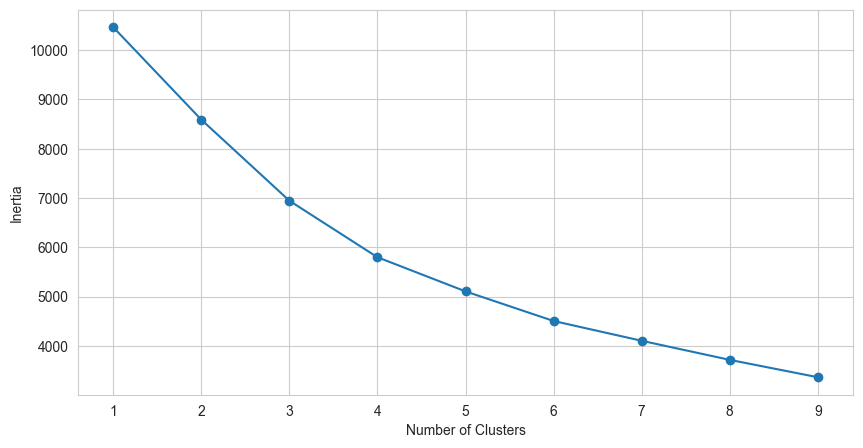

In [49]:
optimise_k_means(df_feat, 10)

In [50]:
kmeans = KMeans(n_clusters = 2)

In [51]:
kmeans.fit(df.drop('survived', axis = 1))

KMeans(n_clusters=2)

In [52]:
 print(accuracy_score(df['survived'],kmeans.labels_))

0.6414373088685015


## Addons
### Lazy Predict

In [56]:
from lazypredict.Supervised import LazyClassifier

In [58]:
clf = LazyClassifier(verbose=0, ignore_warnings=True,custom_metric=None)

In [64]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.35, random_state = 22)


In [65]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


  3%|▎         | 1/29 [00:00<00:06,  4.12it/s]C:\Users\Olayinka Akerekan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Olayinka Akerekan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Olayinka Akerekan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Olayinka Akerekan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Olayinka Akerekan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 45%|████▍     | 13/29 [00:01<00:0

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.81               0.80     0.80      0.81   
KNeighborsClassifier               0.79               0.78     0.78      0.79   
XGBClassifier                      0.79               0.78     0.78      0.79   
DecisionTreeClassifier             0.78               0.77     0.77      0.78   
NearestCentroid                    0.77               0.77     0.77      0.77   
RandomForestClassifier             0.78               0.77     0.77      0.78   
ExtraTreesClassifier               0.77               0.76     0.76      0.77   
GaussianNB                         0.77               0.76     0.76      0.77   
QuadraticDiscriminantAnalysis      0.78               0.76     0.76      0.78   
SVC                                0.77               0.76     0.76      0.77   
BaggingClassifier           